     ball_receipt_outcome ball_recovery_recovery_failure block_offensive  \
0                     NaN                            NaN             NaN   
1                     NaN                            NaN             NaN   
2                     NaN                            NaN             NaN   
3                     NaN                            NaN             NaN   
4                     NaN                            NaN             NaN   
...                   ...                            ...             ...   
4822                  NaN                            NaN             NaN   
4823                  NaN                            NaN             NaN   
4824                  NaN                            NaN             NaN   
4825                  NaN                            NaN             NaN   
4826                  NaN                            NaN             NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
0                  

/tmp/ipykernel_3559480/1467166038.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x','y']] = pd.DataFrame(df.location.tolist(), index= df.index)
/tmp/ipykernel_3559480/1467166038.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x','y']] = pd.DataFrame(df.location.tolist(), index= df.index)


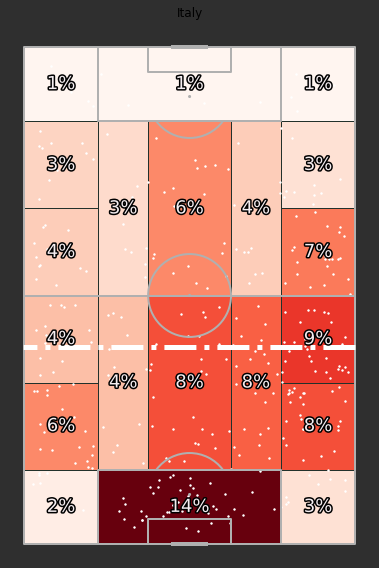

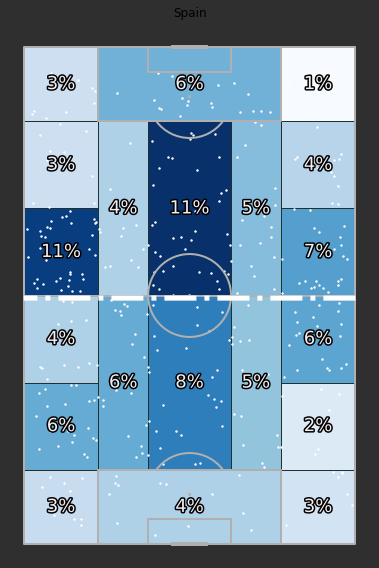

In [4]:
from statsbombpy import sb

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib.colors import to_rgba
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib import colorbar
import matplotlib.patheffects as path_effects

# Read in data

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", None)

###### PASTE HERE THE CSV FOR STATSBOMB EVENTS

#df = pd.read_csv("/content/SpainCroatiaEvents.csv")

events = sb.events(match_id=3795220)
print(events)
mylist = ["Starting XI", "Half Start", "Goal Keeper", "Injury Stoppage", "Own Goal For", "Own Goal Against", "Referee Ball-Drop", 
          "Half End", "Substitution","Tactical Shift", "Bad Behaviour", "Player Off", "Player On",'Penalty']

Devents = events[~events.type.isin(mylist)]
df = Devents
df[['x','y']] = pd.DataFrame(df.location.tolist(), index= df.index)

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

# Renaming the column for easier reference
# df = df.rename(columns={"type/displayName":"type", "outcomeType/displayName":"outcome"})

def_action = ["Pressure","Duel","Ball Recovery", "Clearance","Interception", "Block"]
#df = df[df["playerId"]==136345]
df = df[df.type.isin(def_action)]

# Defensive plot for local team

local_team = "Italy"

df1 = df[(df["team"]== local_team )].reset_index()
print(df1.x.mean())# this number tells the average defensive line location of the team

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#2F2F2F')
fig, ax = pitch.draw(figsize=(11, 8))
fig.set_facecolor('#2F2F2F')
fig.suptitle('Italy')


bin_statistic = pitch.bin_statistic_positional(df1.x, df1.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Reds', edgecolors='#22312b')
pitch.scatter(df1.x, df1.y, c='white', s=2, ax=ax)
pitch.lines(df1.x.mean(), 80, df1.x.mean(), 0 , color="white", ax=ax, lw=5, linestyle="-.")
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)


away_team = "Spain"

df2 = df[(df["team"]== away_team )].reset_index()
print(df2.x.mean()) # this number tells the average defensive line location of the team


pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#2F2F2F')
fig, ax = pitch.draw(figsize=(11, 8))
fig.set_facecolor('#2F2F2F')
fig.suptitle('Spain')


bin_statistic = pitch.bin_statistic_positional(df2.x, df2.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Blues', edgecolors='#22312b')
pitch.scatter(df2.x, df2.y, c='white', s=2, ax=ax)
pitch.lines(df2.x.mean(), 80, df2.x.mean(), 0 , color="white", ax=ax, lw=5, linestyle="-.")
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)
print('yes')